# Import Libraries

In [1]:
from swarmintelligence import MemoryBasedGreyWolfOptimization, Utilization
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import time # calculate CPU time
import pickle

# import package metrics
from sewar.full_ref import *

# Load Data Training

In [2]:
# load the model from disk
train_dataset_misc = pickle.load(open('datasets/train_dataset.pkl', 'rb'))
gray_misc_dataset = train_dataset_misc['gray']
example_gray_scale_image =gray_misc_dataset[1]

In [3]:
gray_misc_dataset

[array([[ 38,  40,  47, ...,  34,  32,  32],
        [ 46,  49,  41, ..., 183, 140, 129],
        [ 48,  45,  91, ..., 254, 254, 255],
        ...,
        [ 59,  63,  75, ...,  85,  84,  83],
        [ 72,  71,  64, ...,  85,  84,  83],
        [ 74,  51,  38, ...,  84,  83,  84]], dtype=uint8),
 array([[ 81,  78,  76, ...,  32,  27,  28],
        [ 83,  81,  78, ...,  26,  31,  29],
        [ 83,  81,  79, ...,  29,  29,  29],
        ...,
        [108, 111, 110, ...,  42,  44,  38],
        [116, 116, 119, ...,  47,  39,  36],
        [116, 114, 126, ...,  45,  42,  37]], dtype=uint8),
 array([[ 58,  98,  80, ..., 196, 199, 198],
        [ 73, 108, 104, ..., 198, 200, 198],
        [ 88, 111,  81, ..., 199, 199, 199],
        ...,
        [124, 145, 133, ...,  90,  84,  85],
        [108, 113, 117, ...,  92,  88,  98],
        [ 96, 102, 112, ..., 107,  97, 107]], dtype=uint8),
 array([[ 45,  61, 118, ..., 127, 123, 121],
        [ 50,  83, 126, ..., 127, 124, 126],
        [ 60, 11

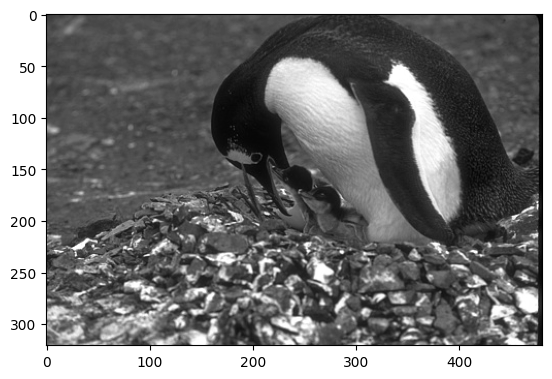

In [4]:
plt.imshow(example_gray_scale_image,cmap='gray')

# Grid Search GA Parameter

## Define Grid Search Parameter

In [5]:
# default params
k = 5
fitness_function = 'otsu'
obj='max'

# define by user
n_populations = [25]
maxIteration = [100]
crossover_rates = np.arange(0.1,1.1,0.1)

## Do a Gridsearch
***
- Find the best MemoryBasedGWO Parameter Combination

***
**Metrics Performances** <br>
1. 5 Train images will be used to train the model and get the average of some metrics
2. Metrics: <br>
- Average CPU time
- Average Fitness
- Average MSE
- Average RMSE
- Average PSNR
- Average SSIM
- Average UQI

In [6]:
gridsearch_results = {
    'combinations': [],
    'k':[],
    'populations':[],
    'max_iteration':[],
    'crossover_rate':[],
    'fitness_function':[],
    'obj':[],
    'Mean CPU_time (seconds)': [],
    'Mean Fitness':[],
    'Mean MSE':[],
    'Mean RMSE':[],
    'Mean PSNR':[],
    'Mean SSIM':[],
    'Mean UQI':[],
}

In [7]:
for n_population in n_populations:
    for max_iteration in maxIteration:
        for cr in crossover_rates:
            cpu_time = []
            fitness_values = []
            list_mse = []
            list_rmse = []
            list_psnr = []
            list_ssim = []
            list_uqi = []
            combination_name = "Population-"+str(n_population)+"_MaxIter-"+str(
                max_iteration)+"_CrossoverRate-"+str(cr)

            # train the model using data train
            for train_image in gray_misc_dataset:
                memGwo = MemoryBasedGreyWolfOptimization(
                    k=k,
                    wolfSize=n_population,
                    maxIteration=max_iteration,
                    fitness_function=fitness_function,
                    crossover_rate = cr
                )
                # get the start time
                st = time.time()
                greyWolfs, best_thresholds = memGwo.fit_run(train_image)
                # get the end time
                et = time.time()
                regions = Utilization().digitize(train_image, best_thresholds)
                # calculate the metrics
                fitness_values.append(memGwo.get_params_training_()[
                                      'best_fitness_tracking'][-1])
                cpu_time.append(et-st)
                list_mse.append(mse(train_image, regions))
                list_rmse.append(rmse(train_image, regions))
                list_psnr.append(psnr(train_image, regions))
                list_ssim.append(ssim(train_image, regions))
                list_uqi.append(uqi(train_image, regions))
                print(memGwo.get_params_training_()[
                                      'best_fitness_tracking'][-1])

            # get the average and then append to dataframe
            gridsearch_results['combinations'].append(combination_name)
            gridsearch_results['k'].append(k)
            gridsearch_results['populations'].append(n_population)
            gridsearch_results['max_iteration'].append(max_iteration)
            gridsearch_results['crossover_rate'].append(cr)
            gridsearch_results['fitness_function'].append(fitness_function)
            gridsearch_results['obj'].append(obj)
            gridsearch_results['Mean CPU_time (seconds)'].append(
                np.mean(np.array(cpu_time)))
            gridsearch_results['Mean Fitness'].append(
                np.mean(np.array(fitness_values)))
            gridsearch_results['Mean MSE'].append(
                np.mean(np.array(list_mse)))
            gridsearch_results['Mean RMSE'].append(
                np.mean(np.array(list_rmse)))
            gridsearch_results['Mean PSNR'].append(
                np.mean(np.array(list_psnr)))
            gridsearch_results['Mean SSIM'].append(
                np.mean(np.array(list_ssim)))
            gridsearch_results['Mean UQI'].append(
                np.mean(np.array(list_uqi)))

2686.430906588207
2171.2625791918967
2668.729071230876
2164.0561360282354
5216.655591459149
5164.719310111301
5765.497383585985
4435.889182373316
1682.9659350846612
632.5344551871556
2675.4656015255205
2167.1149962238924
2662.846686333583
2162.976131565904
5216.452141036144
5171.360365319212
5761.820723095317
4434.175503123936
1693.1694670773702
636.2113820560135
2685.774162834262
2167.9196965212263
2673.5659344518085
2169.7709982308047
5219.67753176858
5149.312590230461
5757.955902632528
4434.299472293642
1691.8571692214377
635.347575802783
2687.552073314846
2169.423177357521
2664.3904791462955
2171.6653141807483
5218.603223185006
5155.951133896019
5774.28623277899
4427.017698708542
1689.6268355790799
634.2399233829834
2688.968457774918
2172.1898775370446
2670.2039406504814
2172.1958888552194
5221.599959535652
5151.541968731295
5770.919943886296
4434.09718146653
1692.9819361701436
636.7939033490379
2682.246395808603
2173.662459976538
2664.5822776204714
2172.23035559683
5212.6465761848

In [8]:
gridsearch_results

{'combinations': ['Population-25_MaxIter-100_CrossoverRate-0.1',
  'Population-25_MaxIter-100_CrossoverRate-0.2',
  'Population-25_MaxIter-100_CrossoverRate-0.30000000000000004',
  'Population-25_MaxIter-100_CrossoverRate-0.4',
  'Population-25_MaxIter-100_CrossoverRate-0.5',
  'Population-25_MaxIter-100_CrossoverRate-0.6',
  'Population-25_MaxIter-100_CrossoverRate-0.7000000000000001',
  'Population-25_MaxIter-100_CrossoverRate-0.8',
  'Population-25_MaxIter-100_CrossoverRate-0.9',
  'Population-25_MaxIter-100_CrossoverRate-1.0'],
 'k': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
 'populations': [25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
 'max_iteration': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
 'crossover_rate': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'fitness_function': ['otsu',
  'otsu',
  'otsu',
  'otsu',
  'otsu',
  'otsu',
  'otsu',
  'otsu',
  'otsu',
  'otsu'],
 'obj': ['max', 'max', 'max', 'max', 'max', 'max', 'max

In [9]:
gridsearch_results_df = pd.DataFrame(gridsearch_results)
gridsearch_results_df

,combinations,k,populations,max_iteration,crossover_rate,fitness_function,obj,Mean CPU_time (seconds),Mean Fitness,Mean MSE,Mean RMSE,Mean PSNR,Mean SSIM,Mean UQI
0,Population-25_MaxIter-100_CrossoverRate-0.1,5,25,100,0.1,otsu,max,0.347695,3258.874055,635.495048,24.071413,20.826847,0.851388,0.942275
1,Population-25_MaxIter-100_CrossoverRate-0.2,5,25,100,0.2,otsu,max,0.369402,3258.159300,657.691454,24.735995,20.540363,0.847378,0.942612
2,Population-25_MaxIter-100_CrossoverRate-0.3000...,5,25,100,0.3,otsu,max,0.349506,3258.548103,685.018326,25.026476,20.508049,0.848063,0.941279
3,Population-25_MaxIter-100_CrossoverRate-0.4,5,25,100,0.4,otsu,max,0.399619,3259.275609,644.845139,24.557927,20.598039,0.846857,0.942421
4,Population-25_MaxIter-100_CrossoverRate-0.5,5,25,100,0.5,otsu,max,0.421689,3261.149306,714.092990,25.148684,20.554253,0.846703,0.940294
5,Population-25_MaxIter-100_CrossoverRate-0.6,5,25,100,0.6,otsu,max,0.460455,3262.303617,714.686909,25.444263,20.373584,0.853451,0.944031
6,Population-25_MaxIter-100_CrossoverRate-0.7000...,5,25,100,0.7,otsu,max,0.395570,3263.400914,698.524715,25.035322,20.560252,0.851401,0.944016
7,Population-25_MaxIter-100_CrossoverRate-0.8,5,25,100,0.8,otsu,max,0.354484,3263.473999,732.171222,25.430499,20.478205,0.850118,0.943853
8,Population-25_MaxIter-100_CrossoverRate-0.9,5,25,100,0.9,otsu,max,0.358788,3260.830637,885.518243,26.932489,20.193313,0.844125,0.940916
9,Population-25_MaxIter-100_CrossoverRate-1.0,5,25,100,1.0,otsu,max,0.351819,3266.216997,722.762676,25.244477,20.543623,0.852591,0.947116


## Find The Optimal WOA Parameter
*** 
Criteria: The Highest Mean Fitness

In [10]:
optimal_results = gridsearch_results_df[
    gridsearch_results_df['Mean Fitness']==gridsearch_results_df['Mean Fitness'].max()
]

In [11]:
optimal_results

,combinations,k,populations,max_iteration,crossover_rate,fitness_function,obj,Mean CPU_time (seconds),Mean Fitness,Mean MSE,Mean RMSE,Mean PSNR,Mean SSIM,Mean UQI
9,Population-25_MaxIter-100_CrossoverRate-1.0,5,25,100,1.0,otsu,max,0.351819,3266.216997,722.762676,25.244477,20.543623,0.852591,0.947116


In [13]:
# extract optimal WOA parameter
optimal_mem_gwo_parameter = {
    'wolfSize': optimal_results['populations'].values[0],
    'maxIteration': optimal_results['max_iteration'].values[0],
    'crossover_rate': optimal_results['crossover_rate'].values[0],
}
optimal_mem_gwo_parameter

{'wolfSize': 25, 'maxIteration': 100, 'crossover_rate': 1.0}

# Save Grid Search and Optimal Parameter

In [14]:
pickle.dump(gridsearch_results_df, open('results/hyperparameter_tuning/memGWO/results.pkl', 'wb'))
pickle.dump(optimal_mem_gwo_parameter, open('results/hyperparameter_tuning/memGWO/optimal_params.pkl', 'wb'))